**What makes up a tweet?**
- length of the tweet
- word frequencies by hate speech/not hate speech
- it being a reetweet or not

### Starting the project.

**Outline:**

**1. importing dataset #1**
  
   1.0 reference of the dataset, brief context behind
   
   1.1 displaying dataset #1
   
   1.2 explaining its current content

**2. importing dataset #2**
   
   2.0 reference of the dataset, brief context behind
   
   2.1 displaying dataset #1
   
   2.2 explaining its current content
   
**3. merging two datasets**
   
   3.1. explaining what changes to make to one dataset to merge
 
**4. Looking at the frequency of hate speech and non-hate speech data (Histogram)**

**5. Making a distribution of the length of** 

   5.0 all tweets, 
   
   5.1 hate-speech tweets, 
   
   5.2 non-hate-speech tweets

**6. Making a data visulization of word frequencies** 
   
   6.1 for hate-speech
   
   6.2 for non-hate speech
   
**7. (maybe) Data visualization for retweet frequencies** 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
print(df.head())
print(df.info())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None


#### Note: label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist.

In [3]:
df.label.value_counts()

## 0 - not hate speech
## 1 - hate speech

0    29720
1     2242
Name: label, dtype: int64

In [4]:
## Class imbalance 
#check if there are any missing values

for i in range(len(df)):
    if df['label'][i] != 0 and df['label'][i] != 1:
        print(df['label'][i])
    else:
        continue
# no output - all 1s and 0s present

In [5]:
## change x-axis

import matplotlib.pyplot as plt

Sentiment_count = df.groupby('label').count()

plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.tokenize import RegexpTokenizer

# #tokenizer to remove unwanted elements from out data like symbols and numbers
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(df['tweet'])

In [7]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     text_counts, df['label'], test_size=0.3, random_state=1)

In [8]:
# from sklearn.naive_bayes import MultinomialNB
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Generation Using Multinomial Naive Bayes
# clf = MultinomialNB().fit(X_train, y_train)
# predicted= clf.predict(X_test)
# print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

### JS file converted to CSV, modifying column names and labels (True/False Boolean -> 0,1)

In [9]:
df_extra = pd.read_csv('trainTweets.csv')

In [10]:
df_extra.head()

,classification,tweet
0,True,rt @_makada_ muslim refugee charged with beati...
1,True,rt @_makada_ muslim refugee charged with beati...
2,True,rt @johnkstahlusa there\'s something wrong wit...
3,True,trouble is it\'s all dem-friendly spending pl...
4,True,rt @amike4761 muslim refugees decline work say...


In [11]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 2 columns):
 classification    678 non-null bool
tweet              678 non-null object
dtypes: bool(1), object(1)
memory usage: 6.1+ KB


In [12]:
## inserting ids starting from len(df) + 1
ids = list(range(len(df)+1, len(df)+len(df_extra)+1))
df_extra.insert(0, 'id', ids)

In [13]:
df_extra.head()

,id,classification,tweet
0,31963,True,rt @_makada_ muslim refugee charged with beati...
1,31964,True,rt @_makada_ muslim refugee charged with beati...
2,31965,True,rt @johnkstahlusa there\'s something wrong wit...
3,31966,True,trouble is it\'s all dem-friendly spending pl...
4,31967,True,rt @amike4761 muslim refugees decline work say...


In [14]:
## couldn't rename bc it had space up front
df_extra = df_extra.rename(columns={'id':'id', ' classification':'label', 'tweet':'tweet'})


In [15]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 3 columns):
id       678 non-null int64
label    678 non-null bool
tweet    678 non-null object
dtypes: bool(1), int64(1), object(1)
memory usage: 11.4+ KB


In [16]:
#for i in range(len(df_extra)):
    #if df_extra['label'][i] == True:
        #df_extra['label'][i] = 1 #hate speech present
    #else:
        #df_extra['label'][i] = 0

In [17]:
df_extra.label.value_counts()

True     339
False    339
Name: label, dtype: int64

In [18]:
## changing bool to int
## True as 1, False as 0

df_extra["label"] = df_extra["label"].astype(int)

In [19]:
df_extra.head()

,id,label,tweet
0,31963,1,rt @_makada_ muslim refugee charged with beati...
1,31964,1,rt @_makada_ muslim refugee charged with beati...
2,31965,1,rt @johnkstahlusa there\'s something wrong wit...
3,31966,1,trouble is it\'s all dem-friendly spending pl...
4,31967,1,rt @amike4761 muslim refugees decline work say...


In [20]:
df_extra.label.value_counts()

1    339
0    339
Name: label, dtype: int64

#### Merging two datasets:

In [21]:
data = df.append(df_extra, ignore_index=True, verify_integrity=False, sort=False)

In [22]:
data.label.value_counts()

0    30059
1     2581
Name: label, dtype: int64

In [23]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32640 entries, 0 to 32639
Data columns (total 3 columns):
id       32640 non-null int64
label    32640 non-null int64
tweet    32640 non-null object
dtypes: int64(2), object(1)
memory usage: 765.1+ KB


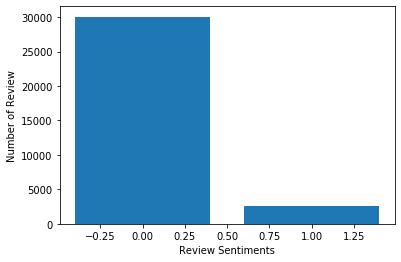

In [25]:
import matplotlib.pyplot as plt

Sentiment_count = data.groupby('label').count()

plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

## x-axis doesn't make sense, change to 0 and 1

### EDA 

4. Looking at the frequency of hate speech and non-hate speech data (Histogram)

5. Making a distribution of the length of

5.0 all tweets,

5.1 hate-speech tweets,

5.2 non-hate-speech tweets

6. Making a data visualization of word frequencies - wordcloud OR histogram

6.1 for hate-speech

6.2 for non-hate speech

7. (maybe) Data visualization for retweet frequencies

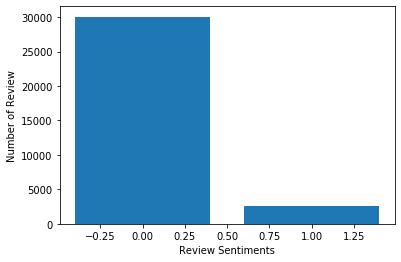

In [26]:
# change x-axis

import matplotlib.pyplot as plt

Sentiment_count = data.groupby('label').count()

plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

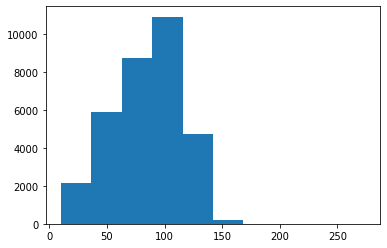

In [65]:
# the length distribution of all tweets
#data.head()
length_tweets = []

for i in range(len(data)):
    length_tweets.append(len(data.tweet[i]))

plt.hist(length_tweets)
plt.show()

#### Splitting dataset into non-hate speech and hate speech

In [53]:
data_hate = data.loc[data.label==1]
data_no_hate = data.loc[data.label==0]

In [56]:
#data_hate.tweet.iloc[0]

"@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  "

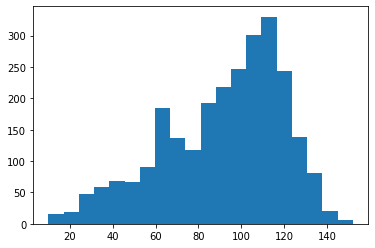

In [63]:
# the length distribution of all tweets that include hate speech
#data.head()
length_tweets_h = []

for i in range(len(data_hate)):
    length_tweets_h.append(len(data_hate.tweet.iloc[i]))

plt.hist(length_tweets_h, bins=20)
plt.show()

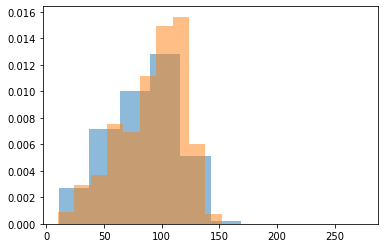

In [70]:
# the length distribution of all tweets that do not include hate speech
#data.head()
length_tweets_nh = []

for i in range(len(data_no_hate)):
    length_tweets_nh.append(len(data_no_hate.tweet.iloc[i]))

plt.hist(length_tweets_nh, density=True, alpha=0.5) + plt.hist(length_tweets_h, density=True, alpha=0.5)
plt.show()

#### Analysis and Conclusion
- no significant difference in between lengths of hate and non-hate tweets
-> look into distributions of words

In [ ]:
#conda install -c conda-forge wordcloud

In [35]:
import nltk

In [36]:
## iloc[]

from nltk.tokenize import word_tokenize

# x - what's in any row

# tokenize and lower()
data['tweet_token'] = data['tweet'].apply(lambda x: word_tokenize(x.lower()))

#data['tweet_token'] = ''
#for i in range(len(data)):
    #text = data['tweet'].iloc[i] 
    #tokenized_text = word_tokenize(text)

In [37]:
data.head()

,id,label,tweet,tweet_token
0,1,0,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the..."
4,5,0,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]"


In [38]:
## Boolean filters
#data[data.label == 1] #hate speech tweets
data.loc[data.label==1, 'tweet_token']

13       [@, user, #, cnn, calls, #, michigan, middle, ...
14       [no, comment, !, in, #, australia, #, opkillin...
17                            [retweet, if, you, agree, !]
23       [@, user, @, user, lumpy, says, i, am, a, ., p...
34       [it, 's, unbelievable, that, in, the, 21st, ce...
                               ...                        
32296    [yeah, yeah, yeah, ., ., poor, you, ., ., ., y...
32297    [@, foxnews, @, love_the_donald, how, about, f...
32298                 [bitch, you, look, like, a, refugee]
32299    [this, is, not, the, idea, for, refugees, who,...
32300    [#, sanctuarycities, ethiopian, \'refugee\, ',...
Name: tweet_token, Length: 2581, dtype: object

In [39]:
# removing stopwords - using NLTK

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

#stop_words

In [40]:
data.tweet_token

0        [@, user, when, a, father, is, dysfunctional, ...
1        [@, user, @, user, thanks, for, #, lyft, credi...
2                                  [bihday, your, majesty]
3        [#, model, i, love, u, take, with, u, all, the...
4             [factsguide, :, society, now, #, motivation]
                               ...                        
32635    [#, eus, treatment, of, lone, #, children, was...
32636    [rt, @, chakerkhazaal, \, ', #, einstein, was,...
32637    [rt, @, ticley, god, help, those, poor, refuge...
32638    [success, from, refugee, to, neurobiologist, h...
32639    [rt, @, hasasimo, #, syria, refugee, helps, fu...
Name: tweet_token, Length: 32640, dtype: object

In [41]:
#filtered_sent = []

data['token_clean'] = data['tweet_token'].apply(lambda x: [w for w in x if w not in stop_words])
data.head()

,id,label,tweet,tweet_token,token_clean
0,1,0,@user when a father is dysfunctional and is s...,"[@, user, when, a, father, is, dysfunctional, ...","[@, user, father, dysfunctional, selfish, drag..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[@, user, @, user, thanks, for, #, lyft, credi...","[@, user, @, user, thanks, #, lyft, credit, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[#, model, i, love, u, take, with, u, all, the...","[#, model, love, u, take, u, time, urð±, !, ..."
4,5,0,factsguide: society now #motivation,"[factsguide, :, society, now, #, motivation]","[factsguide, :, society, #, motivation]"


In [42]:
import string

list_punctuation = []
for ch in string.punctuation:
    list_punctuation.append(ch)
    
print(list_punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [43]:
# removing punctuation
# import standard punctuation, remove

import string

data['token_cleaner'] = data['token_clean'].apply(lambda x: [w for w in x if w not in list_punctuation])

data['token_cleaner']

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, ca, n't, us...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
32635    [eus, treatment, lone, children, one, shameful...
32636    [rt, chakerkhazaal, einstein, refugee, world, ...
32637    [rt, ticley, god, help, poor, refugees, frump,...
32638    [success, refugee, neurobiologist, arrived, sw...
32639    [rt, hasasimo, syria, refugee, helps, fulfill,...
Name: token_cleaner, Length: 32640, dtype: object

In [44]:
#list(string.ascii_lowercase)

In [45]:
import string

#string.printable

#https://stackoverflow.com/questions/5891453/how-do-i-get-a-list-of-all-the-ascii-characters-using-python
#https://www.w3schools.com/charsets/ref_html_ascii.asp

In [46]:
## removing the special characters outside punctuation

import string
#list_alph = list(string.ascii_lowercase)
#list_alph = [chr(i) for i in range(128)][33:]
data['token_clean_alph'] = data['token_cleaner'].apply(lambda x: [i for i in x if i.isalpha()])
data['token_clean_alph']

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, ca, use, ca...
2                                        [bihday, majesty]
3                          [model, love, u, take, u, time]
4                        [factsguide, society, motivation]
                               ...                        
32635    [eus, treatment, lone, children, one, shameful...
32636    [rt, chakerkhazaal, einstein, refugee, world, ...
32637    [rt, ticley, god, help, poor, refugees, frump,...
32638    [success, refugee, neurobiologist, arrived, sw...
32639    [rt, hasasimo, syria, refugee, helps, fulfill,...
Name: token_clean_alph, Length: 32640, dtype: object

#### Word frequencies 
#### Wordcloud of words in the tweets (cleaned tweets, no special characters)

In [78]:
from collections import Counter


frequency_dict = dict()

for each_tweet in range(len(data['token_clean_alph'])):
    for word in each_tweet:
        if word in frequency_dict: #do this
            frequency_dict[word] += 1
        else: 
            frequency_dict[word] = 1

In [47]:
#import nltk

#nltk.download('words')
#words = set(nltk.corpus.words.words())

#'hunky-dory' --> ['hunky', 'dory']
#'hunky-dory' --> ['hunky-dory']
#'hunky-dory' --> ['hunkydory']

In [48]:
# retweets - rt - include if it's a retweet or not (new column)
# users text - user
# weird characters - ð, ±

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

data['words_stemmed'] = data['token_clean_alph'].apply(lambda x: [ps.stem(i) for i in x])

In [49]:
data['words_stemmed']

0        [user, father, dysfunct, selfish, drag, kid, d...
1        [user, user, thank, lyft, credit, ca, use, cau...
2                                        [bihday, majesti]
3                          [model, love, u, take, u, time]
4                              [factsguid, societi, motiv]
                               ...                        
32635    [eu, treatment, lone, children, one, shame, as...
32636    [rt, chakerkhaza, einstein, refuge, world, tur...
32637    [rt, ticley, god, help, poor, refuge, frump, p...
32638    [success, refuge, neurobiologist, arriv, switz...
32639    [rt, hasasimo, syria, refuge, help, fulfil, fo...
Name: words_stemmed, Length: 32640, dtype: object

In [ ]:
# retweets - checking later

In [ ]:
# lemmatization - checking later

In [ ]:
#saving to CSV
#data.to_csv('test_tweets_ML.csv', index=False)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.tokenize import RegexpTokenizer

# #tokenizer to remove unwanted elements from out data like symbols and numbers
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(data['tweet'])

# data.to_csv('test_tweets_edit.csv', index=False)

### Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# reference - https://www.davidsbatista.net/blog/2018/02/28/TfidfVectorizer/

def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)  

In [ ]:
docs = data['words_stemmed']

tfidf.fit(docs)
tfidf.vocabulary_

In [ ]:
tfidf.transform(docs)